In [1]:
import cmocean.cm as cmo
import colorcet
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from cartopy import crs as ccrs

from plot_functions import (
    plot_difference,
    side_by_side_plot,
    get_wrfout_var,
    get_wrfout_uhi,
    get_wrfout_q,
    get_wrfout_wspd,
    add_subplot,
    generate_cmap_for_landuse,
    get_extent,
    plot_colormesh,
)


In [2]:
# path to experiment output files

wur_path = "../results/wur/wrfout_d04_2019-07-23_06:00:00"
wur_lcz_path = "../results/wur_lcz/wrfout_d04_2019-07-23_06:00:00"

## Humidity


(<Figure size 1500x500 with 2 Axes>,
 <GeoAxes: title={'left': 'Summer in the City - CGLC-MODIS-LCZ'}>)

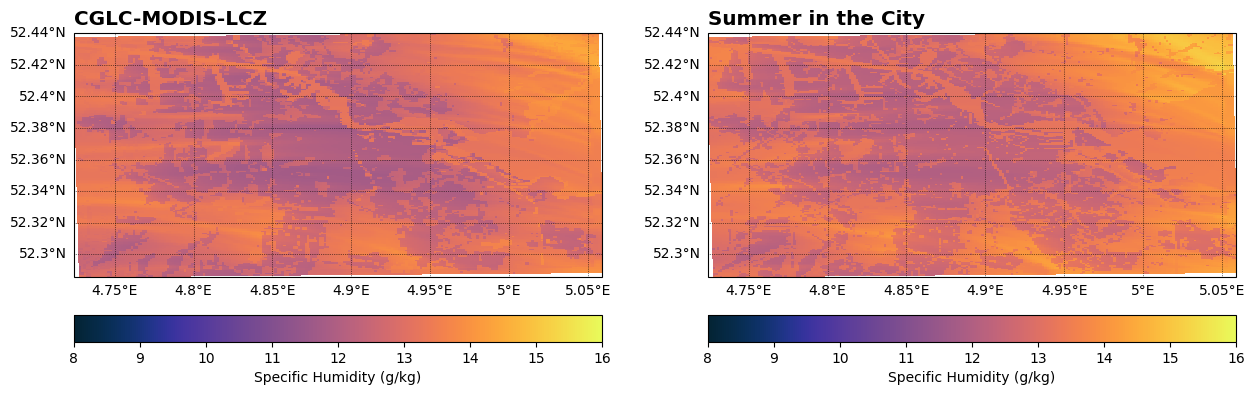

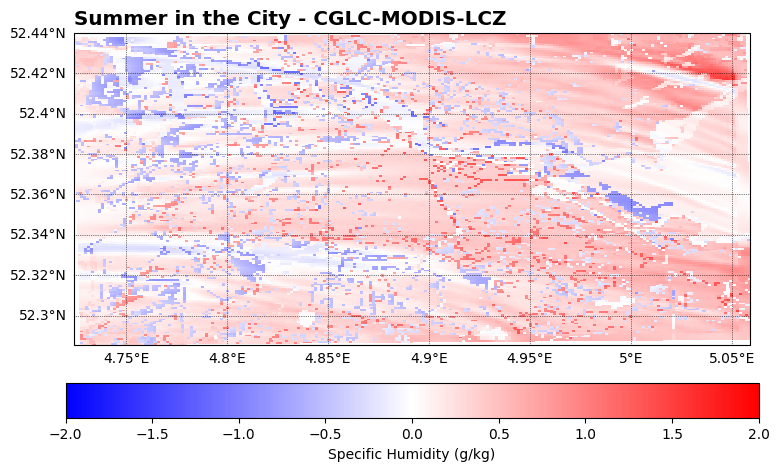

In [3]:
variables = [
    get_wrfout_q(wur_lcz_path, 34),
    get_wrfout_q(wur_path, 34),
]
titles = [
    "CGLC-MODIS-LCZ",
    "Summer in the City",
]
unit = "Specific Humidity (g/kg)"

fig, axes = side_by_side_plot(
    variables, titles, unit, vmin=8, vmax=16, cmap=cmo.thermal
)

plot_difference(variables, titles, unit, vmin=-2, vmax=2, cmap="bwr")

## Temperature


(<Figure size 1500x500 with 2 Axes>,
 <GeoAxes: title={'left': 'Summer in the City - CGLC-MODIS-LCZ'}>)

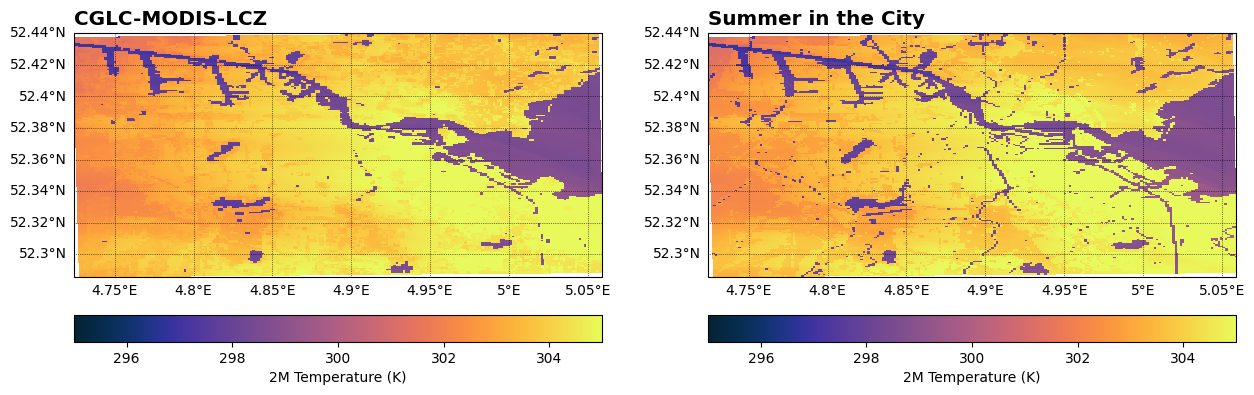

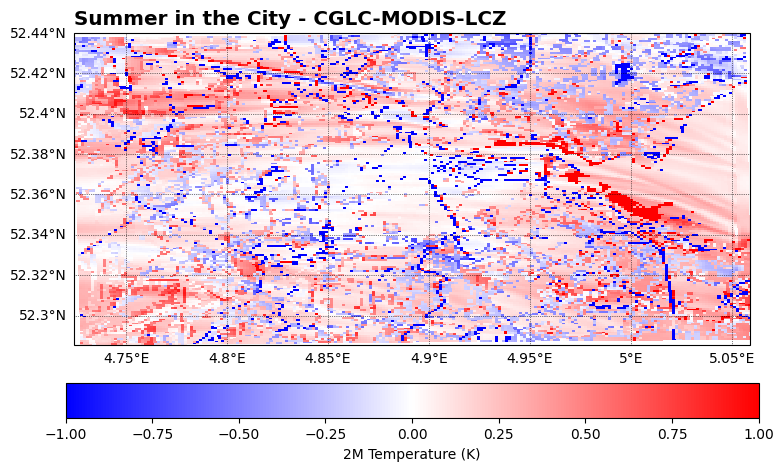

In [4]:
variables = [
    get_wrfout_var(wur_lcz_path, "T2", 34),
    get_wrfout_var(wur_path, "T2", 34),
]
titles = [
    "CGLC-MODIS-LCZ",
    "Summer in the City",
]
unit = "2M Temperature (K)"

fig, axes = side_by_side_plot(
    variables, titles, unit, vmin=295, vmax=305, cmap=cmo.thermal
)
plot_difference(variables, titles, unit, vmin=-1, vmax=1, cmap="bwr")

(<Figure size 1500x500 with 2 Axes>,
 <GeoAxes: title={'left': 'Summer in the City - CGLC-MODIS-LCZ'}>)

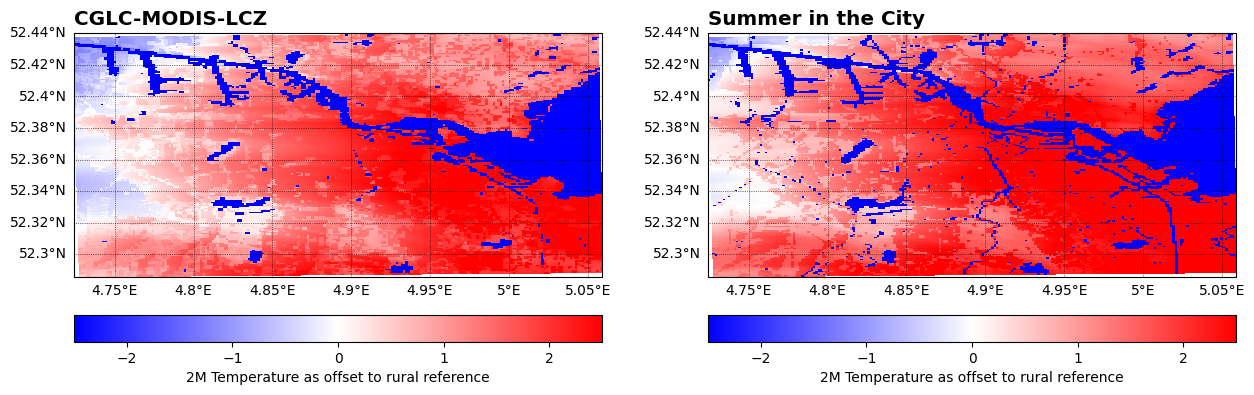

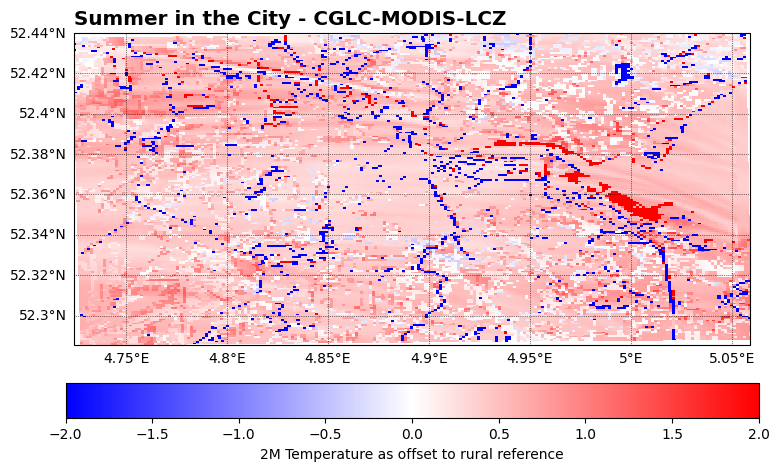

In [5]:
variables = [
    get_wrfout_uhi(wur_lcz_path, 34, landuse="MODIS"),
    get_wrfout_uhi(wur_path, 34, landuse="USGS"),
]
titles = [
    "CGLC-MODIS-LCZ",
    "Summer in the City",
]
unit = "2M Temperature as offset to rural reference"

fig, axes = side_by_side_plot(variables, titles, unit, vmin=-2.5, vmax=2.5, cmap="bwr")

plot_difference(variables, titles, unit, vmin=-2, vmax=2, cmap="bwr")

## Wind


/scratch-local/69025/ipykernel_1918557/3786466863.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  variables, titles, unit, vmin=2.5, vmax=5.5, cmap=get_cmap("cet_kbc")


(<Figure size 1500x500 with 2 Axes>,
 <GeoAxes: title={'left': 'Summer in the City - CGLC-MODIS-LCZ'}>)

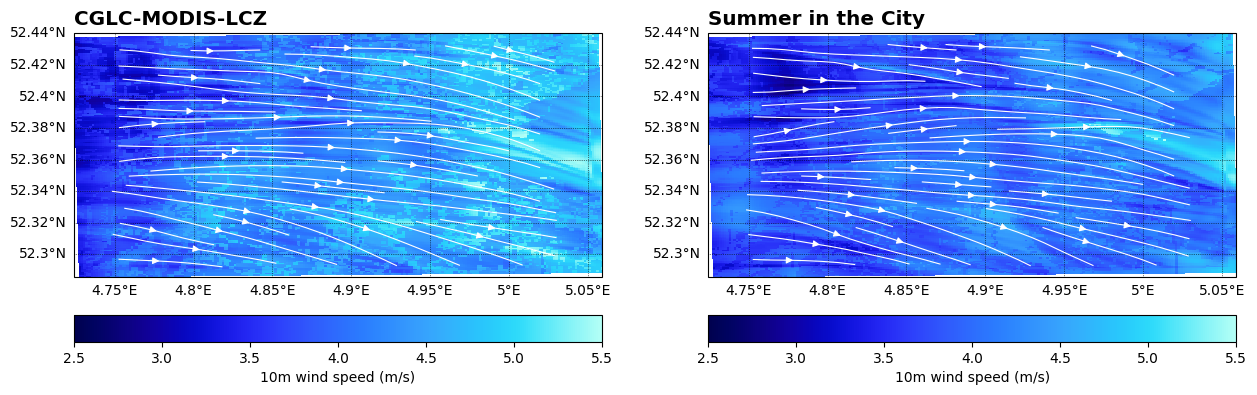

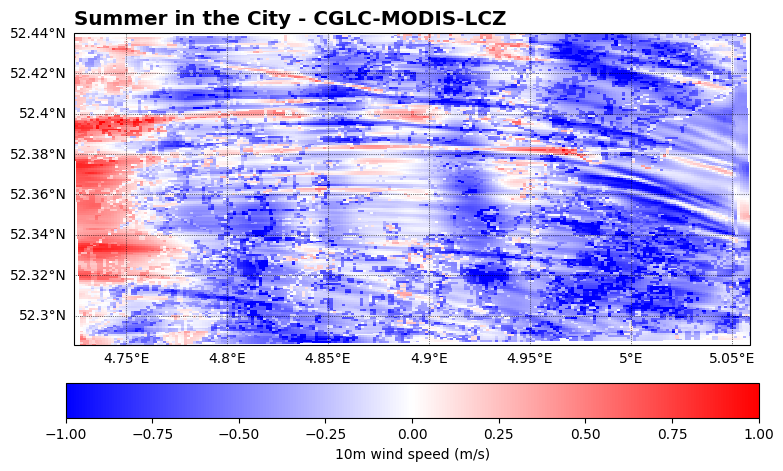

In [6]:
variables = [
    get_wrfout_wspd(wur_lcz_path, 34),
    get_wrfout_wspd(wur_path, 34),
]
titles = [
    "CGLC-MODIS-LCZ",
    "Summer in the City",
]
unit = "10m wind speed (m/s)"

fig, axes = side_by_side_plot(
    variables, titles, unit, vmin=2.5, vmax=5.5, cmap=get_cmap("cet_kbc")
)

# add streamlines
us = [
    get_wrfout_var(wur_lcz_path, "U10", 34),
    get_wrfout_var(wur_path, "U10", 34),
]
vs = [
    get_wrfout_var(wur_lcz_path, "V10", 34),
    get_wrfout_var(wur_path, "V10", 34),
]
for ax, u, v in zip(axes, us, vs):
    ax.streamplot(
        u.lon,
        u.lat,
        u,
        v,
        transform=ccrs.PlateCarree(),
        density=[0.6, 1],
        color="white",
        linewidth=0.8,
    )

# Plot difference
plot_difference(variables, titles, unit, vmin=-1, vmax=1, cmap="bwr")

## Land use


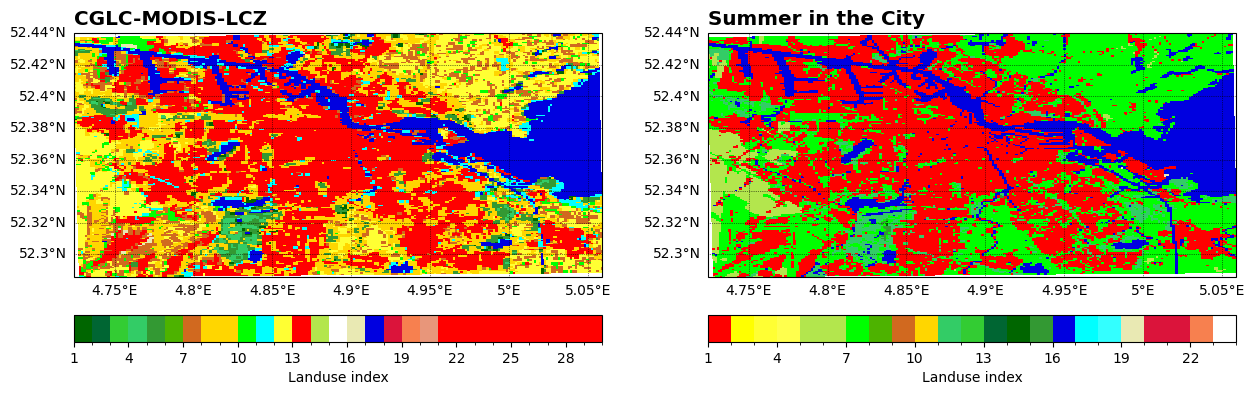

In [9]:
variables = [
    get_wrfout_var(wur_lcz_path, "LU_INDEX", 34),
    get_wrfout_var(wur_path, "LU_INDEX", 34),
]
titles = [
    "CGLC-MODIS-LCZ",
    "Summer in the City",
]
landuse_type = ["MODIS", "USGS"]
unit = "Landuse index"

fig = plt.figure(figsize=(15, 5))

for i, (variable, title, landuse) in enumerate(zip(variables, titles, landuse_type)):
    ax = add_subplot(fig, 1, 2, i+1, title)
    ax.set_extent(get_extent(variable))
    cmap, norm = generate_cmap_for_landuse(landuse)
    plot_colormesh(fig, ax, variable, unit, cmap=cmap, norm=norm)